<a href="https://colab.research.google.com/github/hemu2014/python-data-test/blob/main/5%20-%20Real%20Example__33.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

Let's get started by importing Bitcoin and Ether data:

In [2]:
df = pd.read_csv(
    '/content/btc-eth-prices-outliers.csv',
    index_col=0,
    parse_dates=True
)

In [5]:
df.head()

,Bitcoin,Ether
Timestamp,,
2017-04-02,1099.169125,48.55
2017-04-03,1141.813000,44.13
2017-04-04,1141.600363,44.43
2017-04-05,1133.079314,44.90
2017-04-06,1196.307937,43.23


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 365 entries, 2017-04-02 to 2018-04-01
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Bitcoin  365 non-null    float64
 1   Ether    362 non-null    float64
dtypes: float64(2)
memory usage: 8.6 KB


In [14]:
df.index

DatetimeIndex(['2017-04-02', '2017-04-03', '2017-04-04', '2017-04-05',
               '2017-04-06', '2017-04-07', '2017-04-08', '2017-04-09',
               '2017-04-10', '2017-04-11',
               ...
               '2018-03-23', '2018-03-24', '2018-03-25', '2018-03-26',
               '2018-03-27', '2018-03-28', '2018-03-29', '2018-03-30',
               '2018-03-31', '2018-04-01'],
              dtype='datetime64[ns]', name='Timestamp', length=365, freq=None)

In [15]:
df.index.dtype
# 输出：dtype('<M8[ns]')  # 表示日期时间类型

type(df.index)
# 输出：pandas.core.indexes.datetimes.DatetimeIndex

pandas.core.indexes.datetimes.DatetimeIndex

And now we can run a simple visualization:

行索引就是x轴数据，列数据就是y轴数据

<Axes: xlabel='Timestamp'>

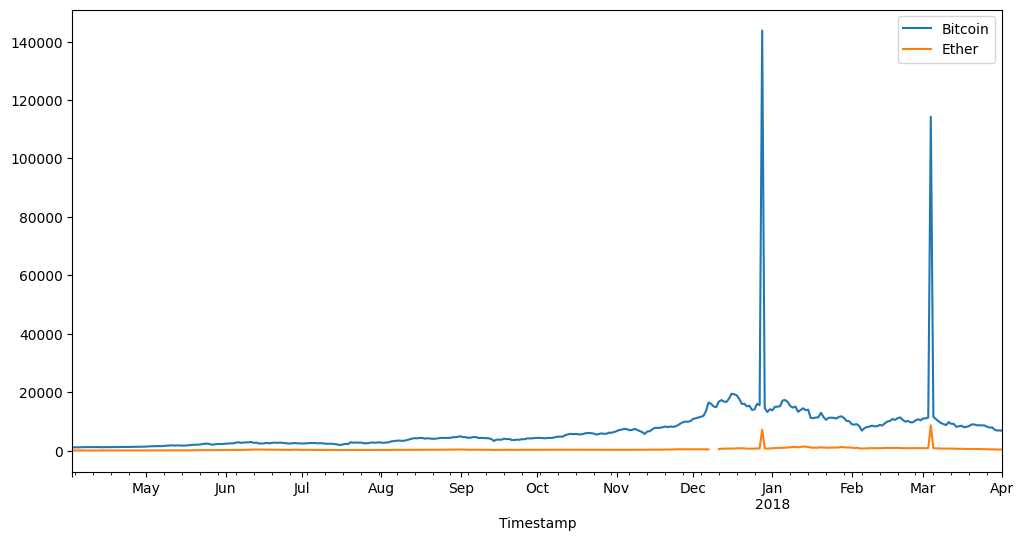

In [16]:
df.plot(figsize=(12, 6))

There are clearly some invalid values, both ETH and BTC have huge spikes. On top of that, there seems to be some data missing in Ether between December 2017 and and January 2018:

取12月到2017-12-15的数据，并指定y轴数据为Ether

<Axes: xlabel='Timestamp'>

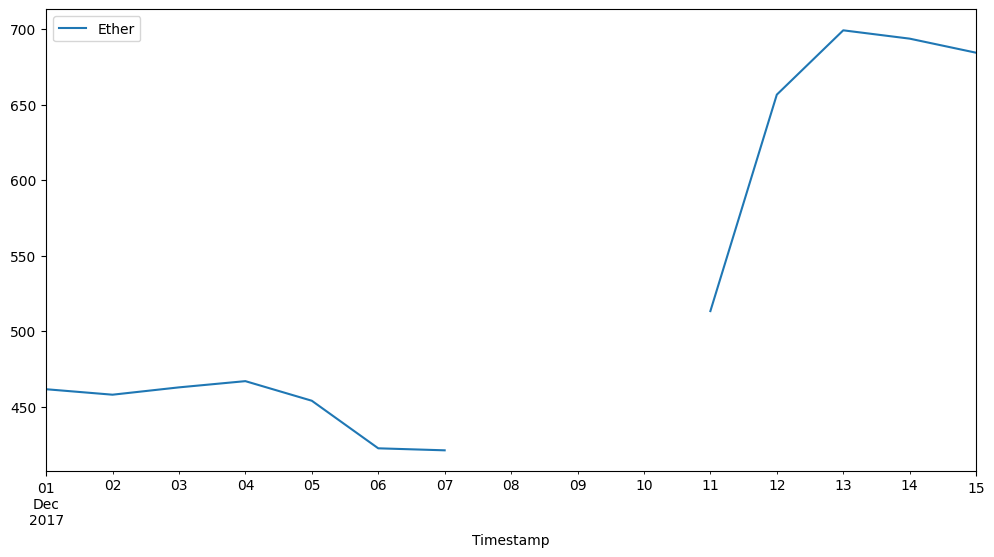

In [21]:
df.loc['2017-12': '2017-12-15'].plot(y='Ether', figsize=(12, 6))

<Axes: xlabel='Timestamp'>

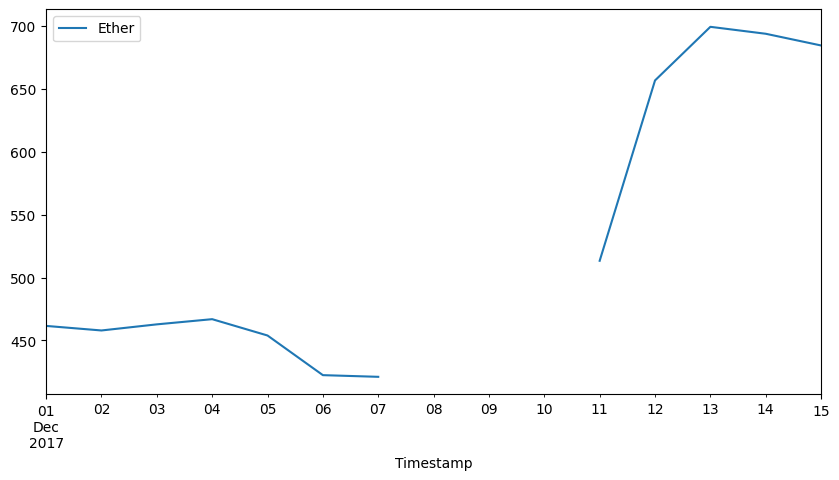

In [22]:
df.loc['2017-12': '2017-12-15'].plot(y='Ether', figsize=(10, 5))

In [23]:
df_na = df.loc['2017-12': '2017-12-15']

Are those null values?

查看ether数据是否有空值

In [24]:
df_na['Ether'].isna().values.any()

np.True_

When? what periods of time?

传递一个布尔数组，将为true的数据显示出来

In [25]:
df_na.loc[df_na['Ether'].isna()]

,Bitcoin,Ether
Timestamp,,
2017-12-08,16007.436667,NaN
2017-12-09,15142.834152,NaN
2017-12-10,14869.805000,NaN


In [26]:
df_na.loc[df_na['Ether'].isna(), "Ether"]

,Ether
Timestamp,
2017-12-08,NaN
2017-12-09,NaN
2017-12-10,NaN


Let's add a little bit more context:

In [27]:
df.loc['2017-12-06': '2017-12-12']

,Bitcoin,Ether
Timestamp,,
2017-12-06,13540.980000,422.48
2017-12-07,16501.971667,421.15
2017-12-08,16007.436667,NaN
2017-12-09,15142.834152,NaN
2017-12-10,14869.805000,NaN
2017-12-11,16762.116667,513.29
2017-12-12,17276.393333,656.52


We now need to decide what we'll do with the missing values. Drop them? fill them? If we decide to fill them, what will be use as fill value? For example: we can use the previous value and just assume the price stayed the same.

不会对原数组进行修改

In [28]:
df.loc['2017-12-06': '2017-12-12'].bfill()

,Bitcoin,Ether
Timestamp,,
2017-12-06,13540.980000,422.48
2017-12-07,16501.971667,421.15
2017-12-08,16007.436667,513.29
2017-12-09,15142.834152,513.29
2017-12-10,14869.805000,513.29
2017-12-11,16762.116667,513.29
2017-12-12,17276.393333,656.52


In [29]:
df.loc['2017-12-06': '2017-12-12']

,Bitcoin,Ether
Timestamp,,
2017-12-06,13540.980000,422.48
2017-12-07,16501.971667,421.15
2017-12-08,16007.436667,NaN
2017-12-09,15142.834152,NaN
2017-12-10,14869.805000,NaN
2017-12-11,16762.116667,513.29
2017-12-12,17276.393333,656.52


要对原数组进行修改，要使用inplace

In [30]:
df.bfill(inplace=True)

In [31]:
df.loc['2017-12-06': '2017-12-12']

,Bitcoin,Ether
Timestamp,,
2017-12-06,13540.980000,422.48
2017-12-07,16501.971667,421.15
2017-12-08,16007.436667,513.29
2017-12-09,15142.834152,513.29
2017-12-10,14869.805000,513.29
2017-12-11,16762.116667,513.29
2017-12-12,17276.393333,656.52


Let's take a look now:

<Axes: xlabel='Timestamp'>

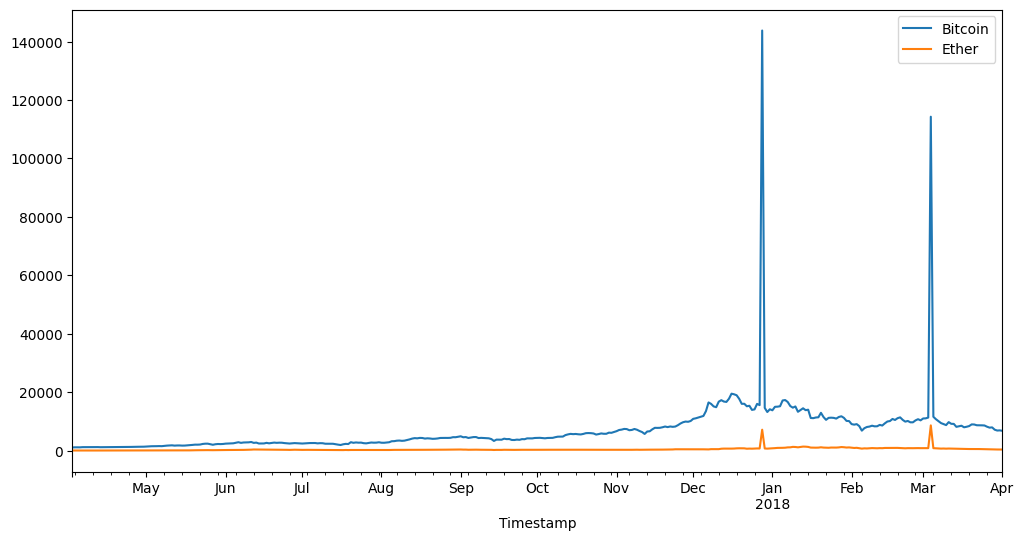

In [32]:
df.plot(figsize=(12, 6))

Much better. We now need to fix the huge spikes. The first step is identifying them. How can we do it? The simple answer is of course visually. They seem to be located in the last 10 days of Dec 2017 and first of March 2018:

异常数据范围

<Axes: xlabel='Timestamp'>

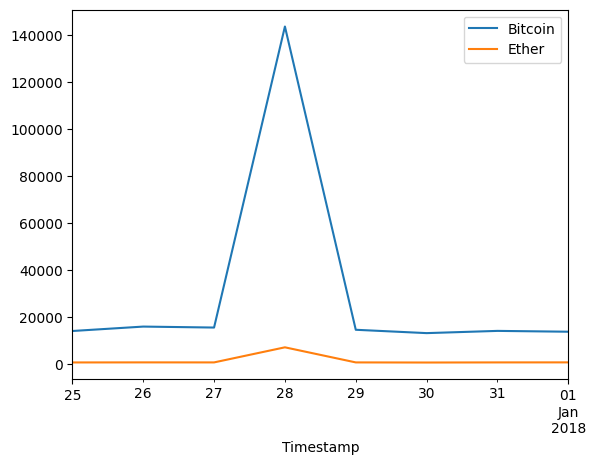

In [33]:
df['2017-12-25':'2018-01-01'].plot()

<Axes: xlabel='Timestamp'>

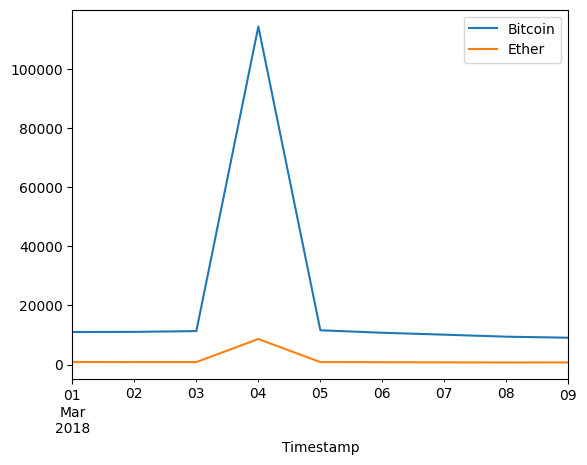

In [34]:
df['2018-03-01': '2018-03-09'].plot()

Apparently, they're located in '2017-12-28' and '2018-03-04':

In [37]:
df_cleaned = df.drop(pd.to_datetime(['2017-12-28', '2018-03-04']))
# df_cleaned.loc['2017-12-29']

,2017-12-29
Bitcoin,14640.14
Ether,739.60


In [39]:
print(df.shape,df_cleaned.shape)

(365, 2) (363, 2)


In [48]:
df3 = df.drop(['2017-12-28', '2018-03-04'])
df3.loc['2017-12-28']

KeyError: '2017-12-28'

<Axes: xlabel='Timestamp'>

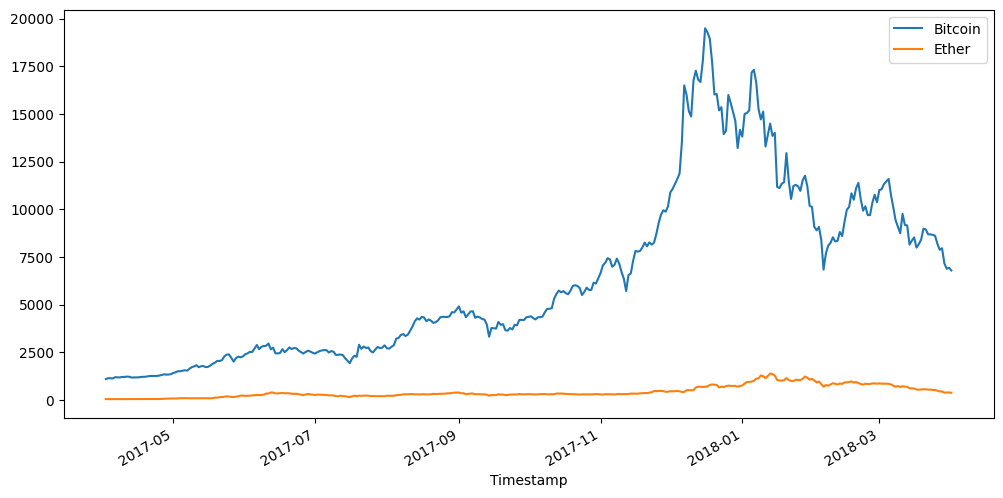

In [38]:
df_cleaned.plot(figsize=(12, 6))

Now it looks much better. Our data seems to be clean.

## Cleaning Analysis

Visualizations helps make sense of the data and let us judge if our analysis and work is on the right track. But we need a more powerful method to handle our data. That's what we call "analysis". We'll use _analytical_ methods to identify these outliers or these skewed values.

### Central Tendency

We'll use a set of common indicators of to measure central tendency and identify these outliers:

##### mean
The mean is probably the most common and popular one. The problem is that it's really sensitive to outliers. The mean of our dataset with invalid values is:

In [49]:
df.mean()

,0
Bitcoin,6996.004022
Ether,469.609068


Both values seem too high. That's because the outliers are skewing with the mean:

处理数据后的平均值

In [50]:
df_cleaned.mean()

,0
Bitcoin,6323.509186
Ether,428.628402


##### median

In [51]:
df.median()

,0
Bitcoin,4594.98785
Ether,309.49000


In [52]:
df_cleaned.median()

,0
Bitcoin,4580.38748
Ether,309.32000


In [53]:
print(df.mode(), df_cleaned.mode())

           Bitcoin   Ether
0      1099.169125  513.29
1      1133.079314     NaN
2      1141.600363     NaN
3      1141.813000     NaN
4      1180.023713     NaN
..             ...     ...
360   18961.856667     NaN
361   19289.785000     NaN
362   19498.683333     NaN
363  114301.816667     NaN
364  143805.816667     NaN

[365 rows x 2 columns]           Bitcoin   Ether
0     1099.169125  513.29
1     1133.079314     NaN
2     1141.600363     NaN
3     1141.813000     NaN
4     1180.023713     NaN
..            ...     ...
358  17737.111667     NaN
359  17771.900000     NaN
360  18961.856667     NaN
361  19289.785000     NaN
362  19498.683333     NaN

[363 rows x 2 columns]


##### mode

It doesn't make much sense to measure the mode, as we have continuous values. But you can do it just with `df.mode()`.

### Visualizing distribution

Now we can use a few of the charts that we saw before + seaborn to visualize the distribution of our values. In particular, we're interested in **histograms**:

<Axes: ylabel='Frequency'>

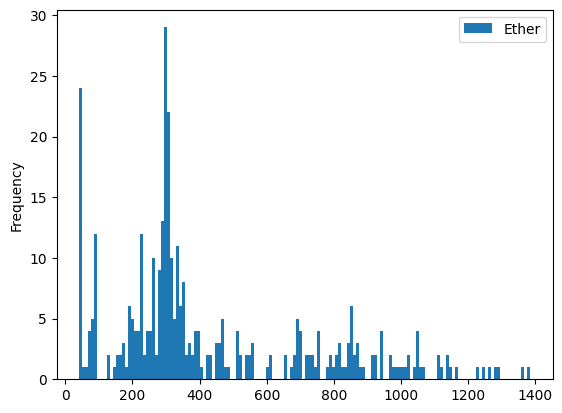

In [54]:
df_cleaned.plot(kind='hist', y='Ether', bins=150)

<Axes: ylabel='Frequency'>

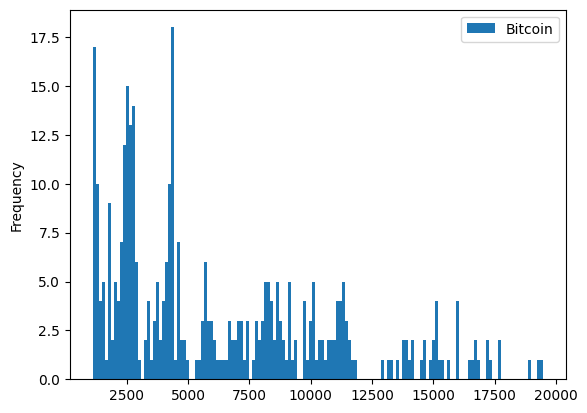

In [55]:
df_cleaned.plot(kind='hist', y='Bitcoin', bins=150)

Using seaborn:

<ipython-input-56-af63e69ef887>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_cleaned['Ether'], ax=ax)


<Axes: xlabel='Ether', ylabel='Density'>

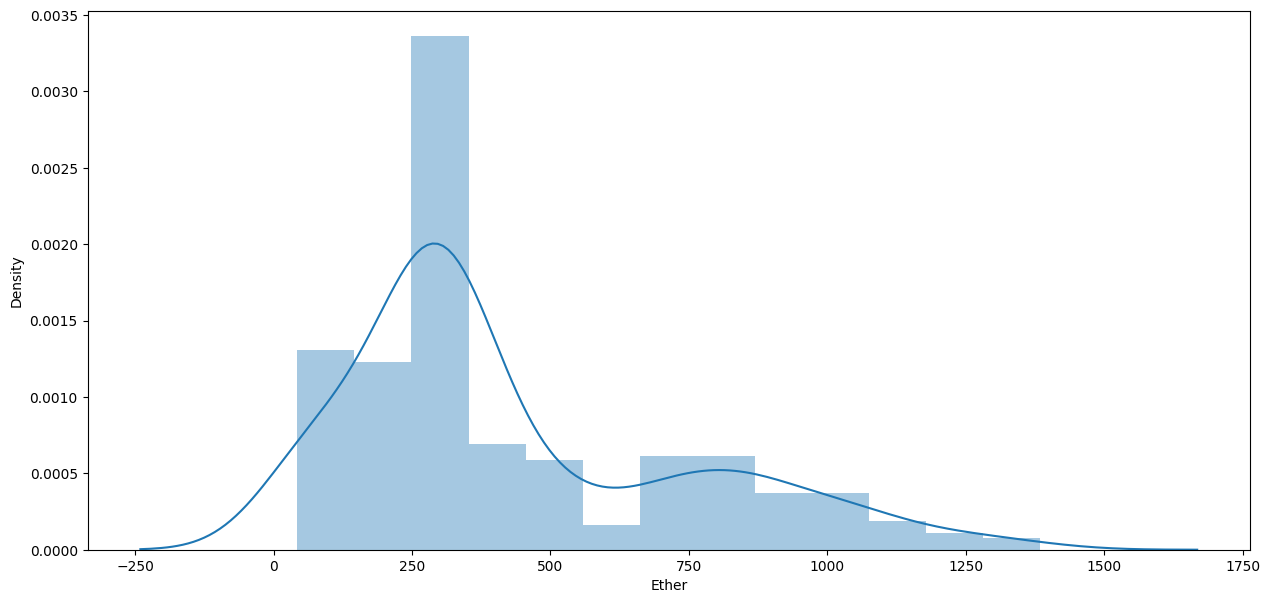

In [56]:
fig, ax = plt.subplots(figsize=(15, 7))
sns.distplot(df_cleaned['Ether'], ax=ax)

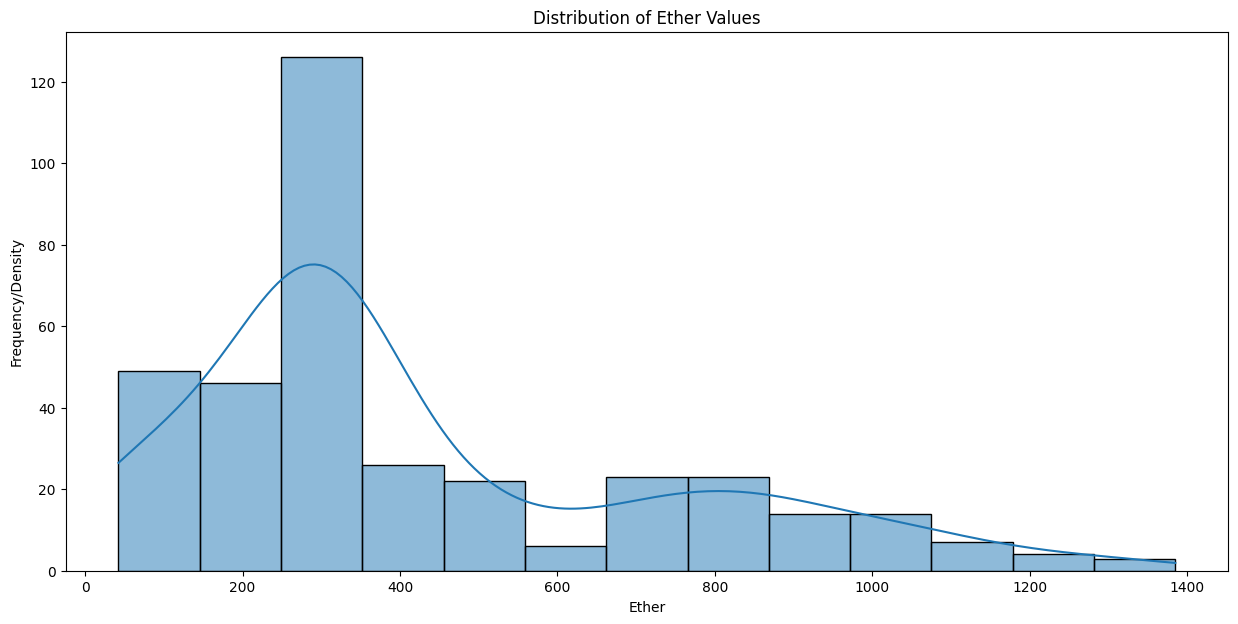

In [58]:
import matplotlib.pyplot as plt
import seaborn as sns

# 创建画布和坐标轴
fig, ax = plt.subplots(figsize=(15, 7))

# 绘制分布图（建议使用 histplot 替代 distplot）
sns.histplot(df_cleaned['Ether'], kde=True, ax=ax)

# 自定义图形
ax.set_title('Distribution of Ether Values')
ax.set_xlabel('Ether')
ax.set_ylabel('Frequency/Density')

plt.show()  # 显示图形

<ipython-input-57-dffe45fa7630>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_cleaned['Bitcoin'], rug=True, ax=ax)


<Axes: xlabel='Bitcoin', ylabel='Density'>

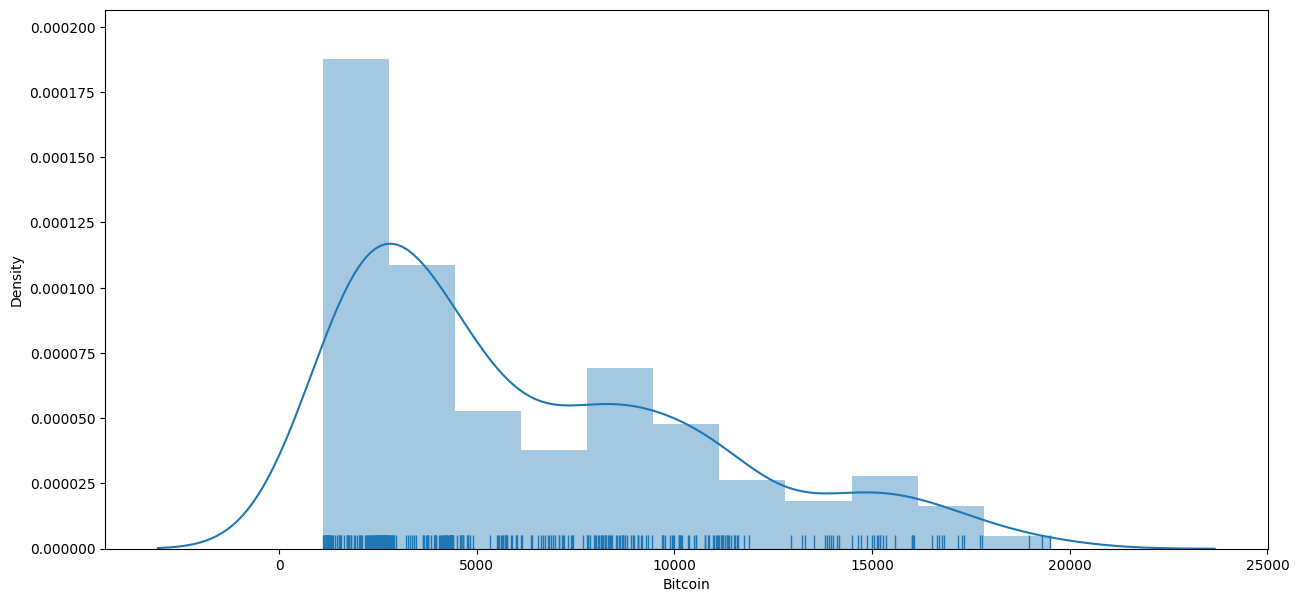

In [57]:
fig, ax = plt.subplots(figsize=(15, 7))
sns.distplot(df_cleaned['Bitcoin'], rug=True, ax=ax)

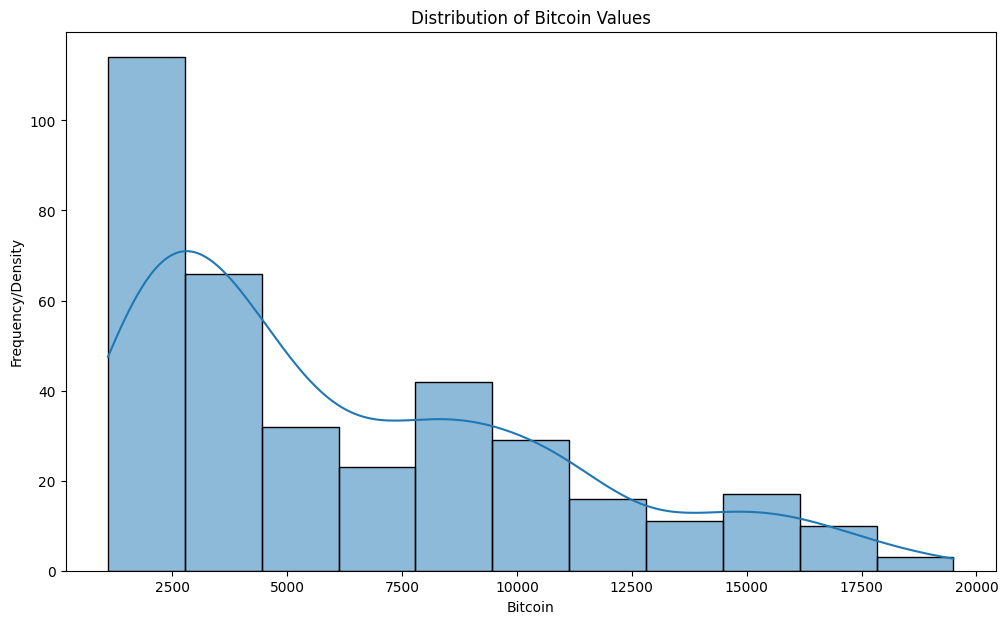

In [61]:
# 创建画布和坐标轴
fig, ax = plt.subplots(figsize=(12, 7))

# 绘制分布图（建议使用 histplot 替代 distplot）
sns.histplot(df_cleaned['Bitcoin'], kde=True, ax=ax)

# 自定义图形
ax.set_title('Distribution of Bitcoin Values')
ax.set_xlabel('Bitcoin')
ax.set_ylabel('Frequency/Density')

plt.show()  # 显示图形

Seaborn's `distplot` is a general method that will plot a histogram, a KDE and a rugplot. You can also use them as separate:

<ipython-input-63-99ccecfd76c2>:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df_cleaned['Ether'], shade=True, cut=0, ax=ax)


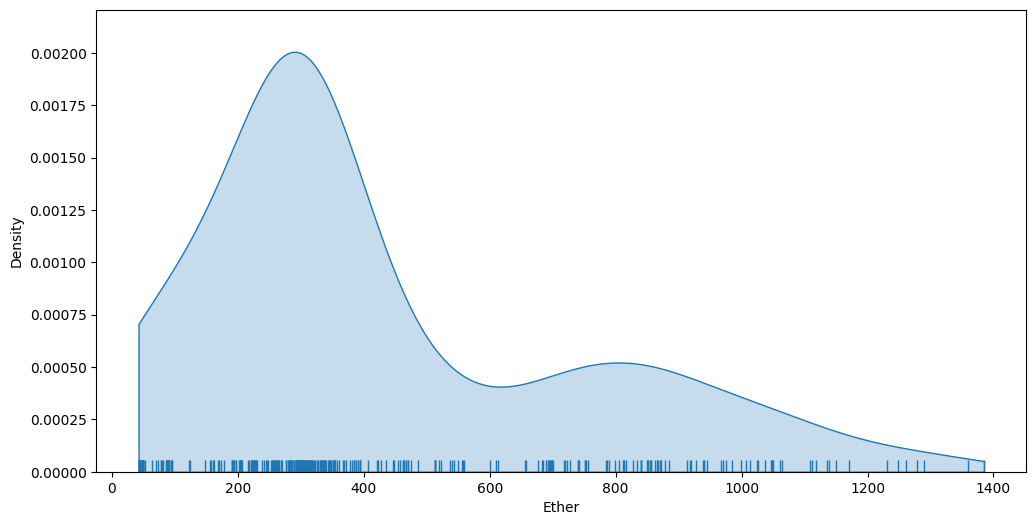

In [63]:
fig, ax = plt.subplots(figsize=(12, 6))
sns.kdeplot(df_cleaned['Ether'], shade=True, cut=0, ax=ax)
sns.rugplot(df_cleaned['Ether'], ax=ax);

<ipython-input-64-a7a3779b2ff8>:8: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(


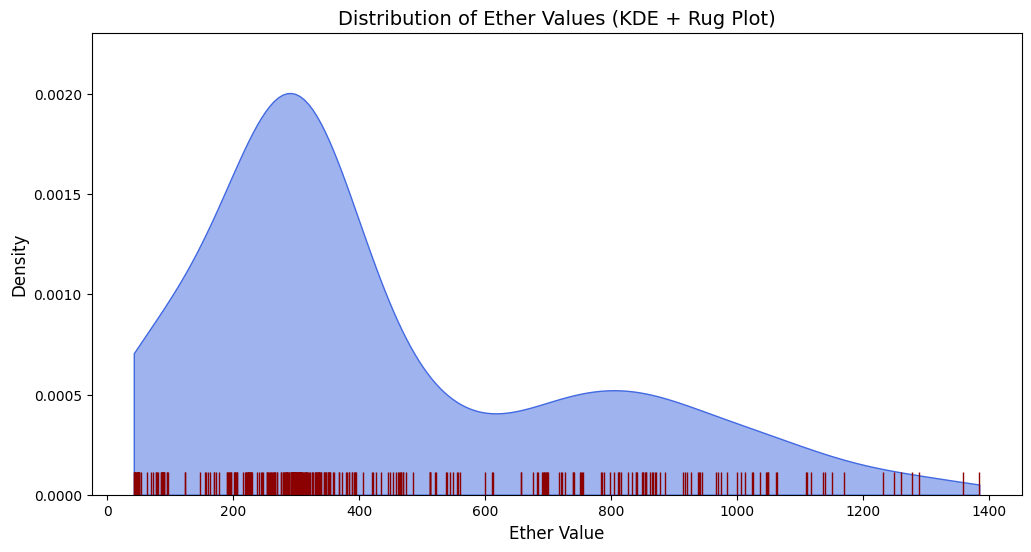

In [64]:
import matplotlib.pyplot as plt
import seaborn as sns

# 初始化画布
fig, ax = plt.subplots(figsize=(12, 6))

# 绘制KDE曲线（填充颜色，限制范围）
sns.kdeplot(
    df_cleaned['Ether'],
    shade=True,
    cut=0,
    color='royalblue',  # 自定义颜色
    alpha=0.5,          # 透明度
    ax=ax
)

# 添加地毯图
sns.rugplot(
    df_cleaned['Ether'],
    color='darkred',    # 自定义颜色
    height=0.05,        # 竖线高度
    ax=ax
)

# 添加标题和标签
ax.set_title('Distribution of Ether Values (KDE + Rug Plot)', fontsize=14)
ax.set_xlabel('Ether Value', fontsize=12)
ax.set_ylabel('Density', fontsize=12)

plt.show()

We can also visualize a cumulative plot of our distribution:

<ipython-input-66-22c9f4671ce7>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_cleaned['Bitcoin'], ax=ax,


<Axes: xlabel='Bitcoin', ylabel='Density'>

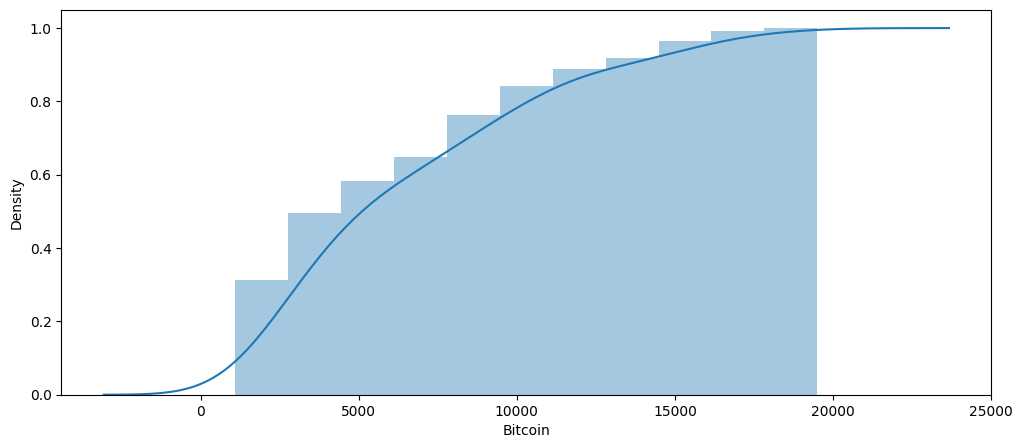

In [66]:
fig, ax = plt.subplots(figsize=(12, 5))
sns.distplot(df_cleaned['Bitcoin'], ax=ax,
             hist_kws=dict(cumulative=True),
             kde_kws=dict(cumulative=True))


This plot shows how many samples fall behind a certain value. We can increase the number of bins in order to have more detail:

<ipython-input-68-5560d7086b61>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_cleaned['Bitcoin'], ax=ax, bins=50,


<Axes: xlabel='Bitcoin', ylabel='Density'>

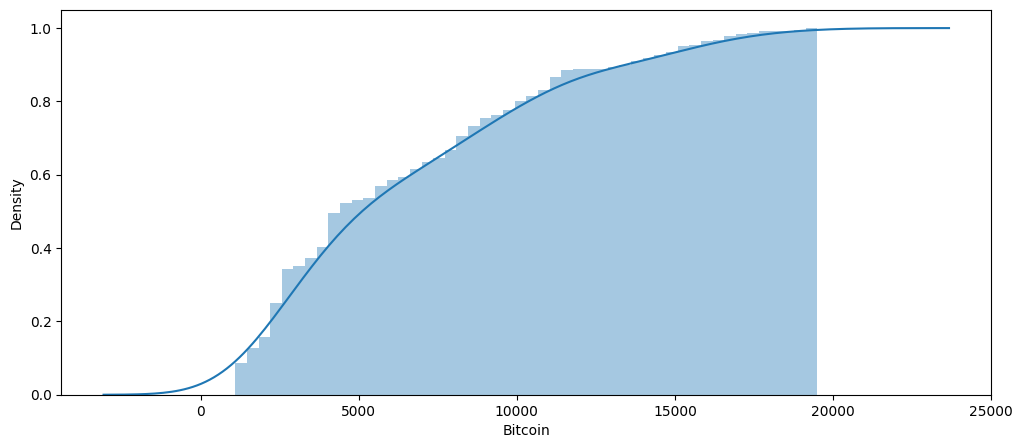

In [68]:
fig, ax = plt.subplots(figsize=(12, 5))
sns.distplot(df_cleaned['Bitcoin'], ax=ax, bins=50,
             hist_kws=dict(cumulative=True),
             kde_kws=dict(cumulative=True))


<Axes: xlabel='Bitcoin', ylabel='Probability'>

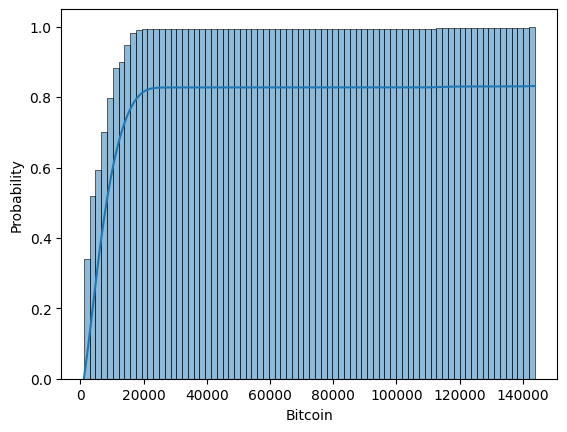

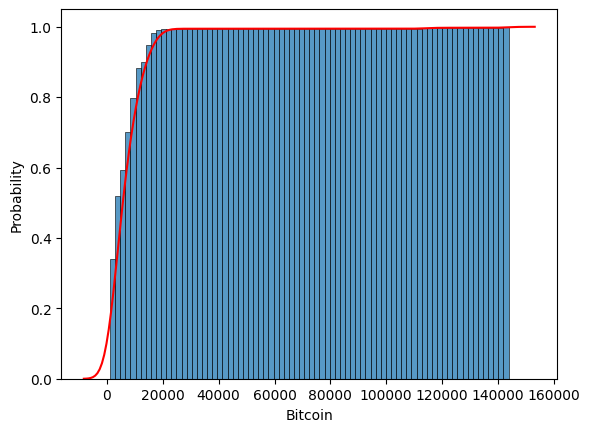

In [69]:
# 使用 histplot 绘制累积直方图
sns.histplot(df['Bitcoin'], kde=True, stat='probability', cumulative=True)

# 或分开绘制（更灵活）
fig, ax = plt.subplots()
sns.histplot(df['Bitcoin'], stat='probability', cumulative=True, ax=ax)
sns.kdeplot(df['Bitcoin'], cumulative=True, ax=ax, color='red')

### Visualizing bivariate distributions

The most common way to observe a bivariate distribution is a scatterplot, the `jointplot` will also include the distribution of the variables:

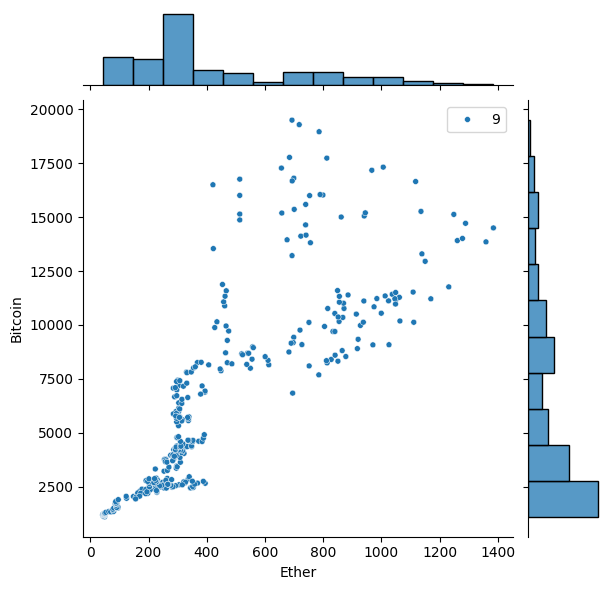

In [74]:
sns.jointplot(x="Ether", y="Bitcoin", data=df_cleaned, size=9)

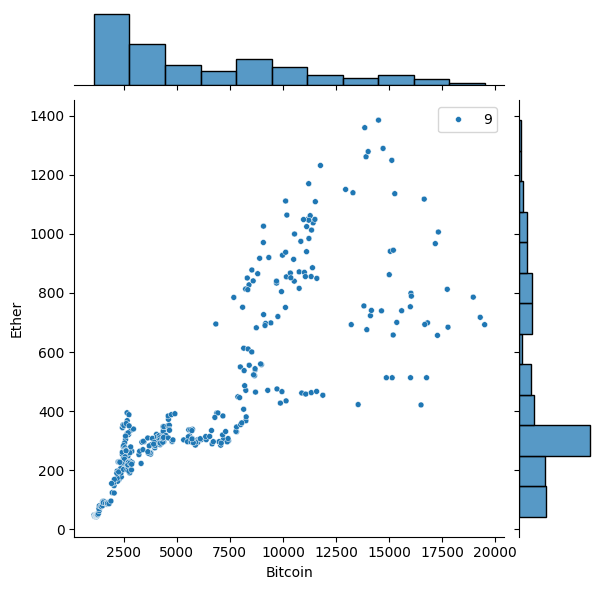

In [73]:
sns.jointplot(x="Bitcoin", y="Ether", data=df_cleaned, size=9)

If you want only a scatter plot, you can use the `regplot` method, that also fits a linear regression model in the plot:

<Axes: xlabel='Bitcoin', ylabel='Ether'>

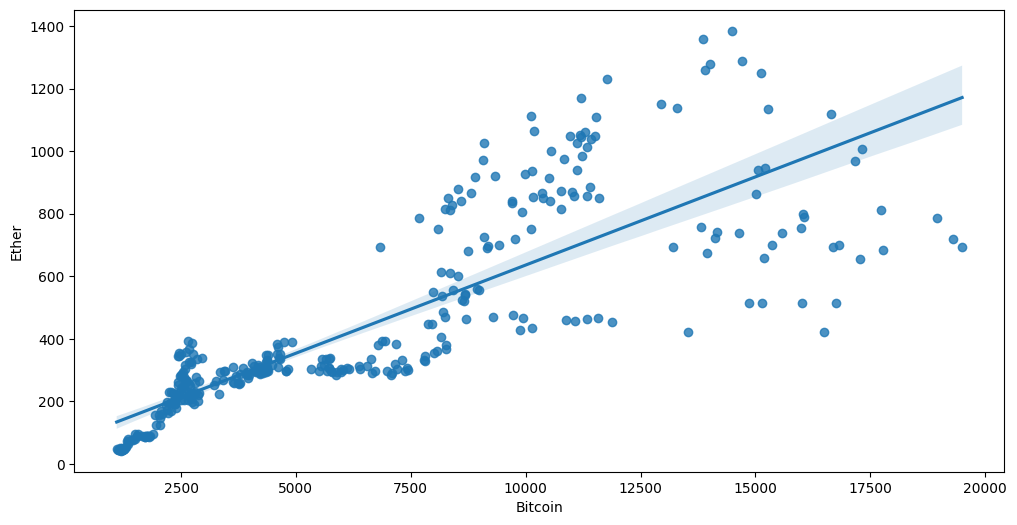

In [72]:
fig, ax = plt.subplots(figsize=(12, 6))
sns.regplot(x="Bitcoin", y="Ether", data=df_cleaned, ax=ax)

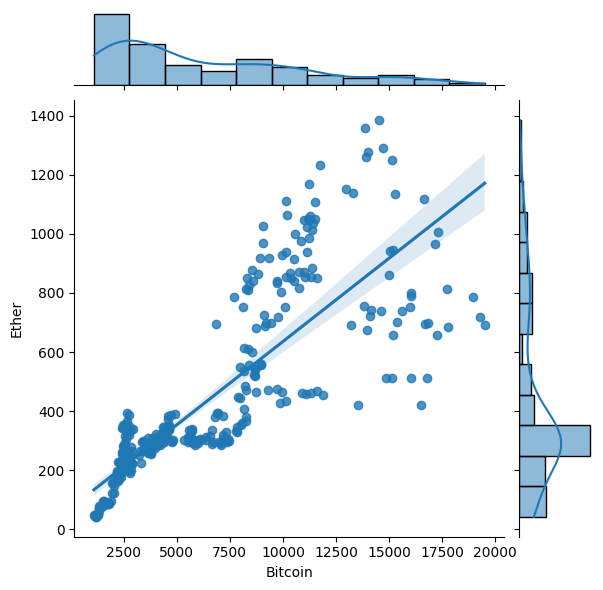

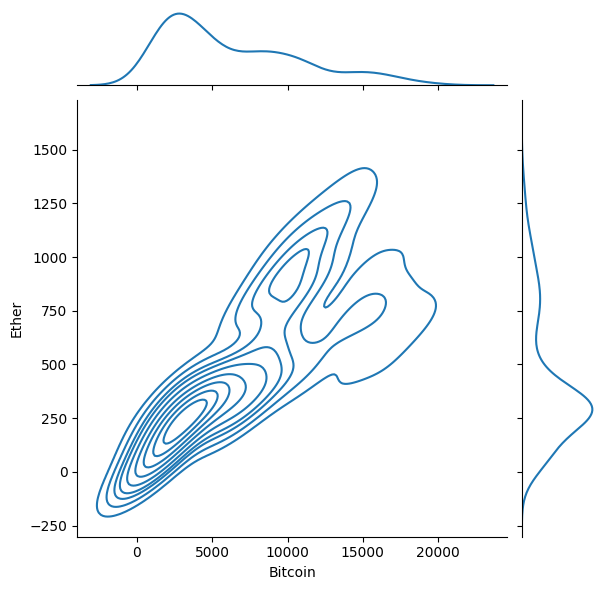

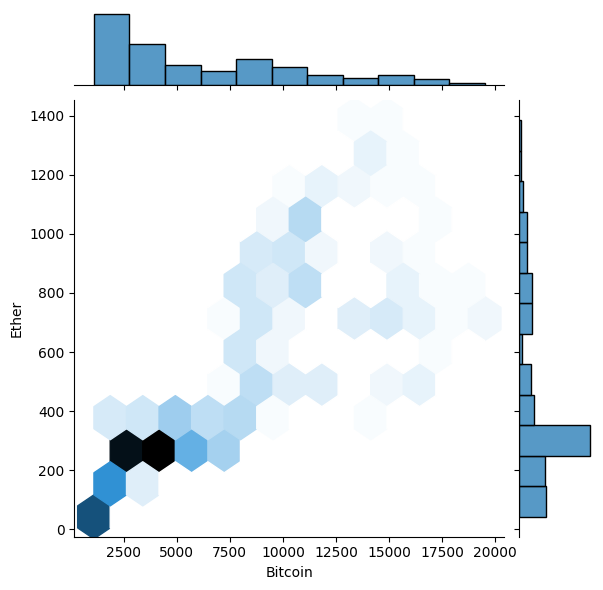

In [75]:
# 散点图 + 线性回归线（默认）
sns.jointplot(x="Bitcoin", y="Ether", data=df_cleaned, kind="reg")

# 核密度估计（KDE）图
sns.jointplot(x="Bitcoin", y="Ether", data=df_cleaned, kind="kde")

# 六边形分箱图（适合大数据集）
sns.jointplot(x="Bitcoin", y="Ether", data=df_cleaned, kind="hex")

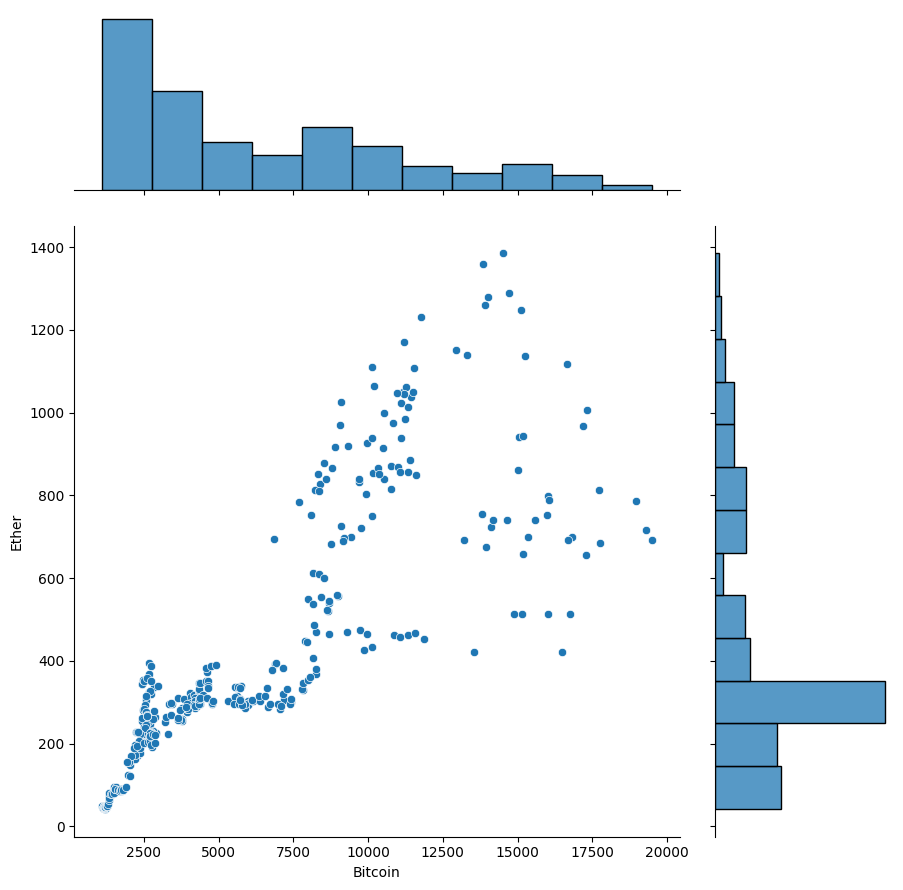

In [76]:
sns.jointplot(x="Bitcoin", y="Ether", data=df_cleaned, height=9, ratio=3)

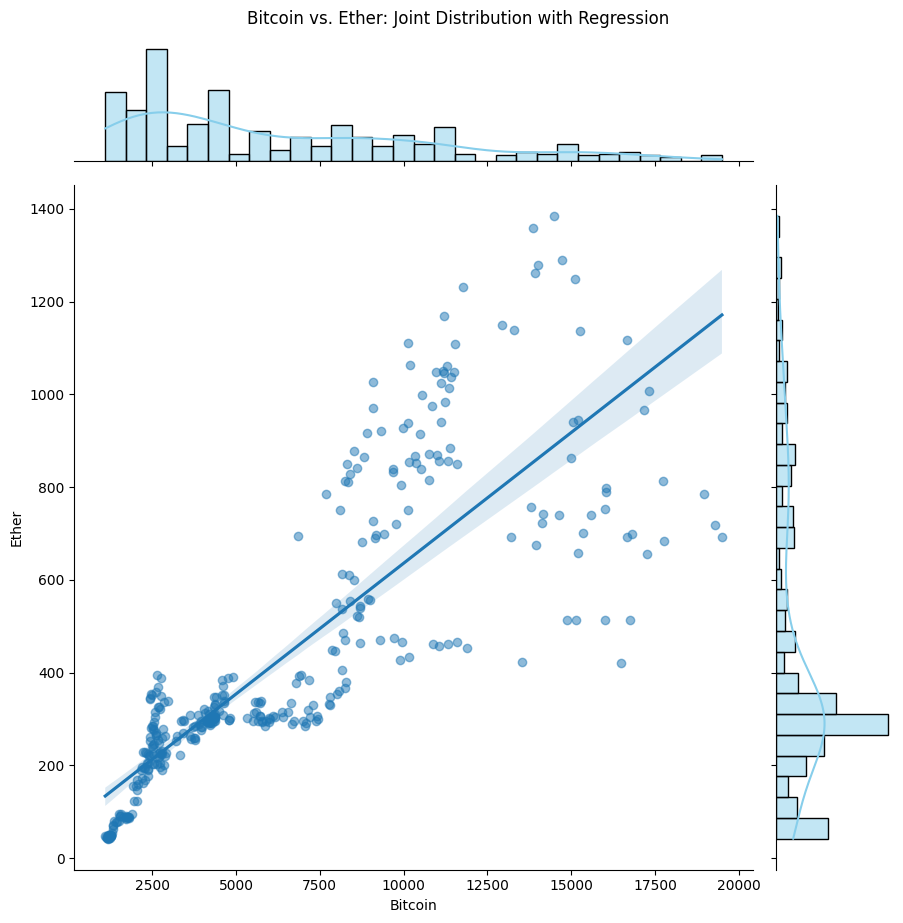

In [77]:
import seaborn as sns

# 绘制联合分布图（带回归线）
jp = sns.jointplot(
    x="Bitcoin",
    y="Ether",
    data=df_cleaned,
    kind="reg",          # 主图：散点图 + 回归线
    height=9,            # 图形高度
    joint_kws={"scatter_kws": {"alpha": 0.5}},  # 散点透明度
    marginal_kws={"bins": 30, "color": "skyblue"}  # 边缘直方图分箱数
)

# 添加标题
jp.fig.suptitle("Bitcoin vs. Ether: Joint Distribution with Regression", y=1.02)

plt.show()

### Quantiles, quartiles and percentiles

In [78]:
df_cleaned['Bitcoin'].quantile(.2)

np.float64(2438.8627342857144)

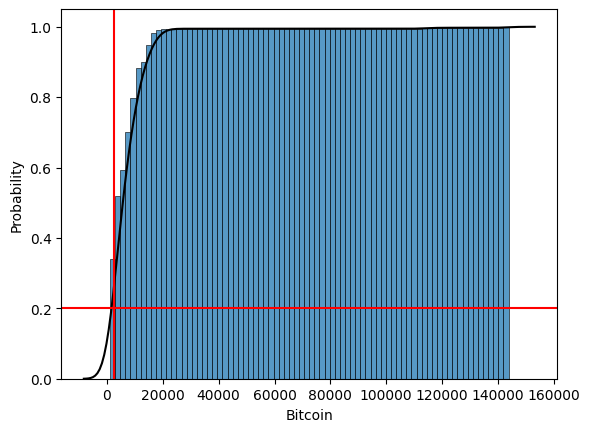

In [83]:
fig, ax = plt.subplots()
sns.histplot(df['Bitcoin'], stat='probability', cumulative=True, ax=ax)
sns.kdeplot(df['Bitcoin'], cumulative=True, ax=ax, color='black')
ax.axhline(0.2, color='red')
ax.axvline(df_cleaned['Bitcoin'].quantile(.2), color='red')

<ipython-input-80-203b7917caaa>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_cleaned['Bitcoin'], ax=ax, bins=50,


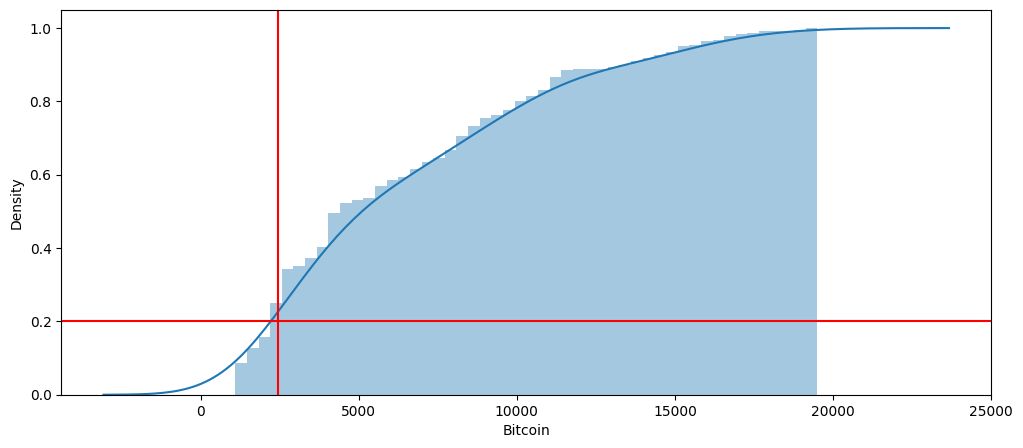

In [80]:
fig, ax = plt.subplots(figsize=(12, 5))
sns.distplot(df_cleaned['Bitcoin'], ax=ax, bins=50,
             hist_kws=dict(cumulative=True),
             kde_kws=dict(cumulative=True))
ax.axhline(0.2, color='red')
ax.axvline(df_cleaned['Bitcoin'].quantile(.2), color='red')

In [84]:
df_cleaned['Bitcoin'].quantile(.5)

np.float64(4580.387479999999)

In [85]:
df_cleaned['Bitcoin'].median()

4580.387479999999

<ipython-input-86-c4969ab21a3d>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_cleaned['Bitcoin'], ax=ax, bins=50,


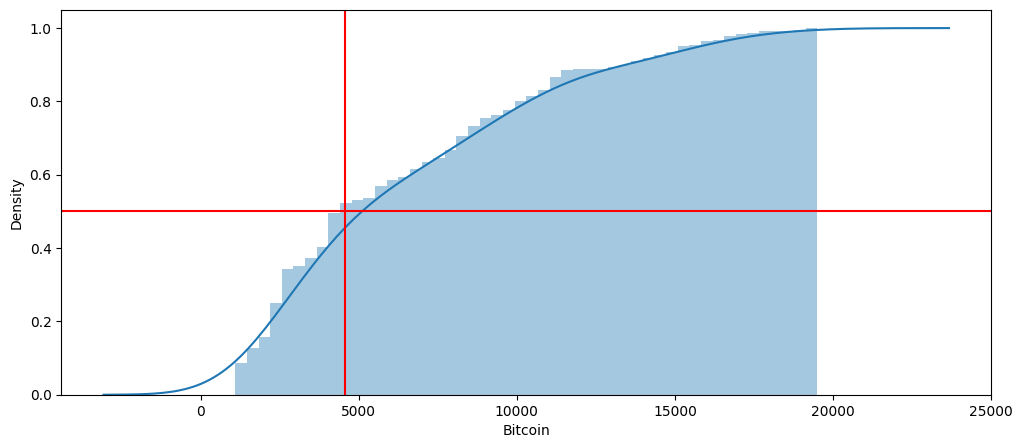

In [86]:
fig, ax = plt.subplots(figsize=(12, 5))
sns.distplot(df_cleaned['Bitcoin'], ax=ax, bins=50,
             hist_kws=dict(cumulative=True),
             kde_kws=dict(cumulative=True))
ax.axhline(0.5, color='red')
ax.axvline(df_cleaned['Bitcoin'].quantile(.5), color='red')

/Users/santiagobasulto/.virtualenvs/ds-classes/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


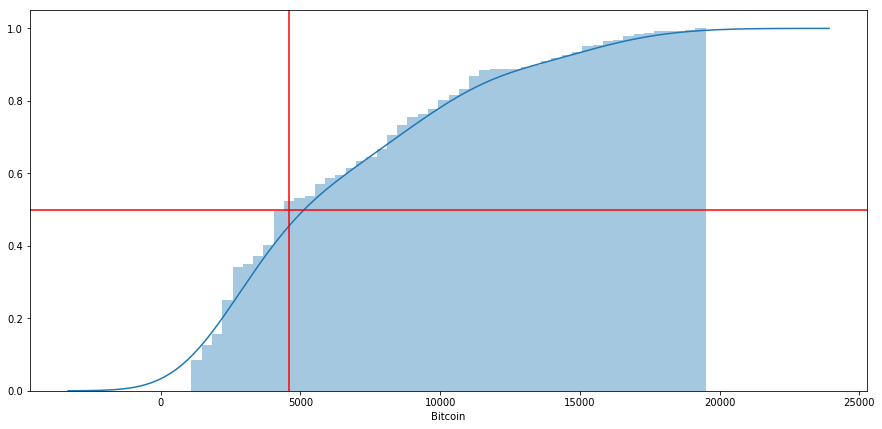

In [ ]:
fig, ax = plt.subplots(figsize=(15, 7))
sns.distplot(df_cleaned['Bitcoin'], ax=ax, bins=50,
             hist_kws=dict(cumulative=True),
             kde_kws=dict(cumulative=True))
ax.axhline(0.5, color='red')
ax.axvline(df_cleaned['Bitcoin'].median(), color='red')

Quantile `0.25` == Percentile `25%` == Quartile `1st`

## Dispersion

We'll use a few methods to measure dispersion in our dataset, most of them well known:

* Range
* Variance and Standard Deviation
* IQR

##### Range

Range is fairly simple to understand, it's just the max - min values:

In [87]:
df['Bitcoin'].max() - df['Bitcoin'].min()

142706.6475416667

Range is **really** sensitive to outliers. As you can see, the range value is extremely high (might indicate the presence of outliers / invalid values).

In [88]:
df_cleaned['Bitcoin'].max() - df_cleaned['Bitcoin'].min()

18399.51420833333

This value now makes a lot more sense. We know that Bitcoin had a high in about 20k, and it was around 900 when we started measuring. It makes more sense now.

##### Variance and Standard Deviation

In [89]:
df['Bitcoin'].var()

103766537.75278114

In [90]:
df['Bitcoin'].std()

10186.586167739471

In [91]:
df_cleaned["Bitcoin"].var()

20374008.23605083

Both variance and std are sensible to outliers as well. We can check with our cleaned dataset:

In [92]:
df_cleaned['Bitcoin'].std()

4513.757662530282

### IQR

The [Interquartile range](https://en.wikipedia.org/wiki/Interquartile_range) is a good measure of "centered" dispersion, and is calculated as `Q3 - Q1` (3rd quartile - 1st quartile).

## quantile----四分位距

In [93]:
df['Bitcoin'].quantile(.75) - df['Bitcoin'].quantile(.25)

np.float64(6597.494147619047)

In [94]:
df_cleaned['Bitcoin'].quantile(.75) - df_cleaned['Bitcoin'].quantile(.25)

np.float64(6548.249242559523)

As you can see, IQR is more robust than std or range, because it's not so sensitive to outliers.

### Analytical Analysis of invalid values

We can now use the measurements we've seen to analyze those values that seem invalid.

##### Using `std`: Z scores

We can now define those values that are a couple of Z scores above or below the mean (or the max/min value). Example:

In [95]:
upper_limit = df['Bitcoin'].mean() + 2 * df['Bitcoin'].std()
lower_limit = df['Bitcoin'].mean() - 2 * df['Bitcoin'].std()
print("Upper Limit: {}".format(upper_limit))
print("Lower Limit: {}".format(lower_limit))

Upper Limit: 27369.176357301683
Lower Limit: -13377.168313656202


In [96]:
print("Upper Limit: {}".format(upper_limit))
print("Lower Limit: {}".format(lower_limit))

Upper Limit: 27369.176357301683
Lower Limit: -13377.168313656202


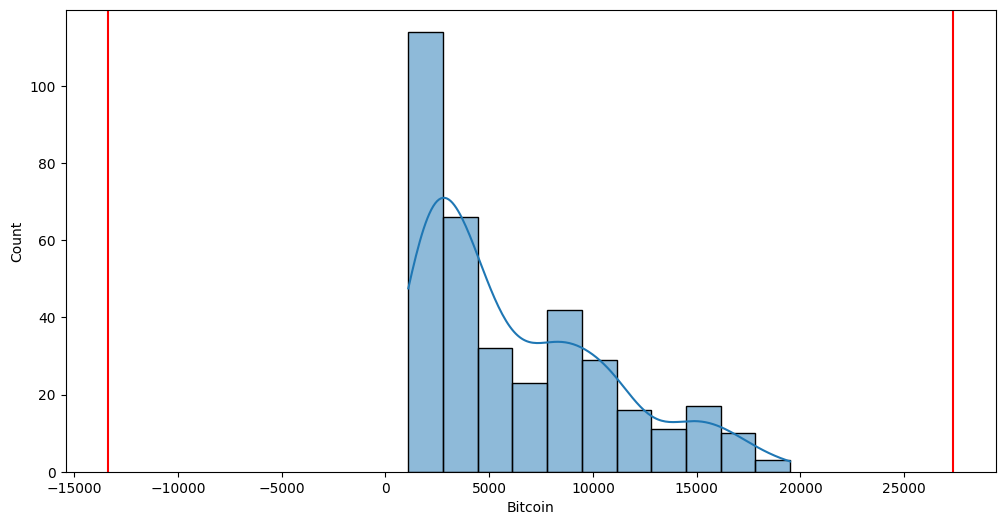

In [100]:

fig, ax = plt.subplots(figsize=(12, 6))
sns.histplot(df_cleaned['Bitcoin'], kde=True, ax=ax)
ax.axvline(lower_limit, color='red')
ax.axvline(upper_limit, color='red')

<ipython-input-97-0aa01148a45a>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Bitcoin'], ax=ax)


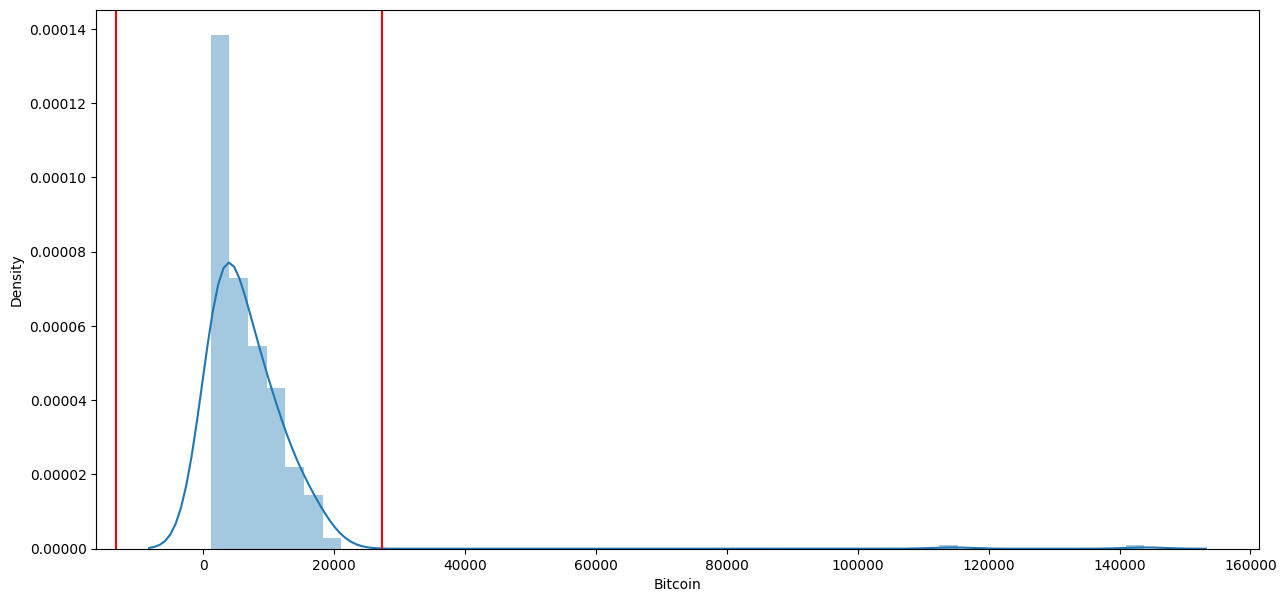

In [97]:
fig, ax = plt.subplots(figsize=(15, 7))
sns.distplot(df['Bitcoin'], ax=ax)
ax.axvline(lower_limit, color='red')
ax.axvline(upper_limit, color='red')

Seems like this is a good measurement. Our lower limit doesn't make a lot of sense, as negative values are invalid. But our upper limit has a really good measure. Anything above \$27,369 is considered to be an invalid value. Pretty accurate.

##### Using IQRs

We can use the IQR instead of std if we think that the standard deviation might be **too** affected by the outliers/invalid values.

In [101]:
iqr = df['Bitcoin'].quantile(.75) - df['Bitcoin'].quantile(.25)
iqr

np.float64(6597.494147619047)

In [102]:
upper_limit = df['Bitcoin'].mean() + 2 * iqr
lower_limit = df['Bitcoin'].mean() - 2 * iqr

In [103]:
print("Upper Limit: {}".format(upper_limit))
print("Lower Limit: {}".format(lower_limit))

Upper Limit: 20190.992317060834
Lower Limit: -6198.9842734153535


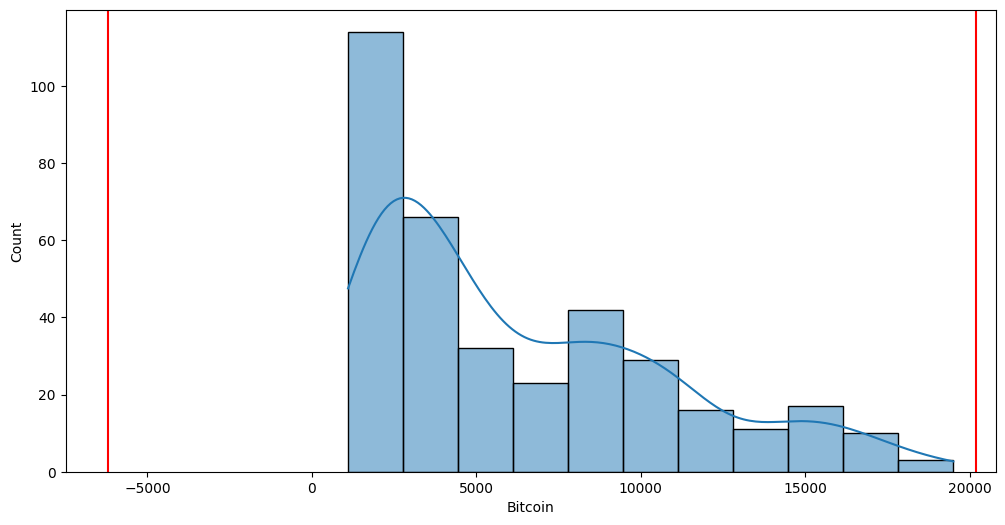

In [105]:
fig, ax = plt.subplots(figsize=(12, 6))
sns.histplot(df_cleaned['Bitcoin'], kde=True, ax=ax)
ax.axvline(lower_limit, color='red')
ax.axvline(upper_limit, color='red')

<ipython-input-104-9a5538409171>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Bitcoin'], ax=ax)


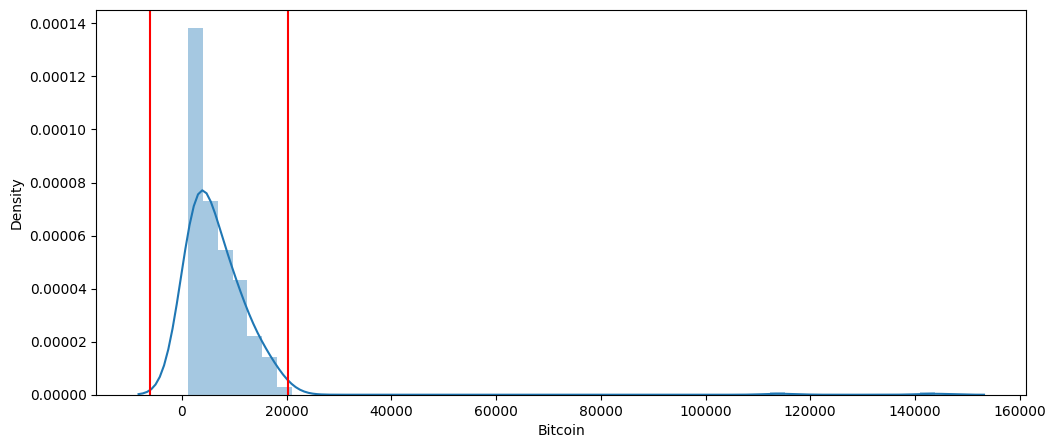

In [104]:
fig, ax = plt.subplots(figsize=(12, 5))
sns.distplot(df['Bitcoin'], ax=ax)
ax.axvline(lower_limit, color='red')
ax.axvline(upper_limit, color='red')

Our measurement now is a little bit less precise. There are a few valid values (20k) that seem to be above our upper limit. Regardless, it's still a good indicator.

### Cleaning invalid values analytically

It's time now to remove these invalid values analytically, we'll use the upper limit defined by standard deviation:

In [106]:
upper_limit = df['Bitcoin'].mean() + 2 * df['Bitcoin'].std()

只是过滤掉了超出上限的行数据

In [108]:
df[df['Bitcoin'] < upper_limit].head()

,Bitcoin,Ether
Timestamp,,
2017-04-02,1099.169125,48.55
2017-04-03,1141.813000,44.13
2017-04-04,1141.600363,44.43
2017-04-05,1133.079314,44.90
2017-04-06,1196.307937,43.23


In [109]:
df[df['Bitcoin'] < upper_limit].shape

(363, 2)

<Axes: xlabel='Timestamp'>

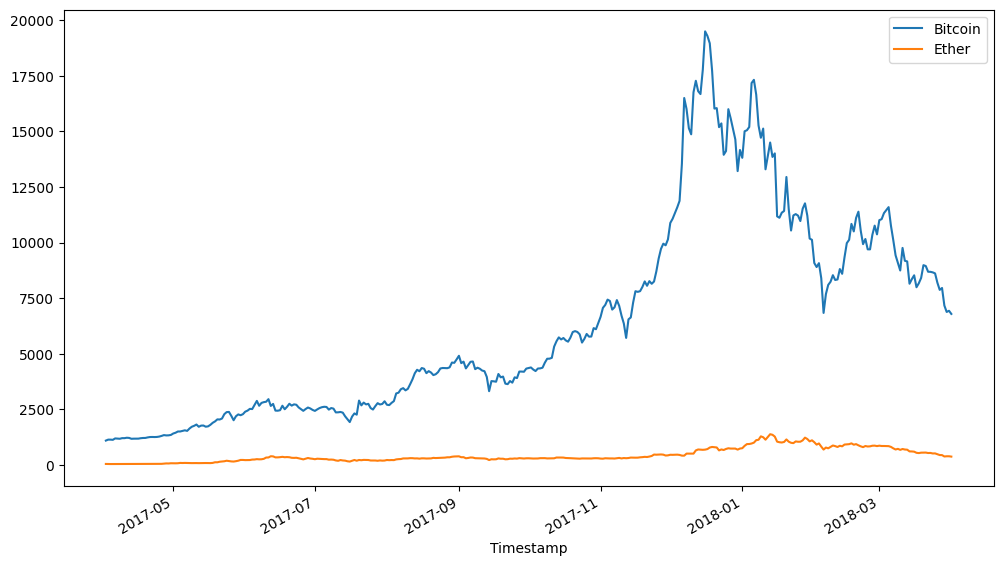

In [107]:
df[df['Bitcoin'] < upper_limit].plot(figsize=(12, 7))

跟上图一致只是，表达方式不同，

<Axes: xlabel='Timestamp'>

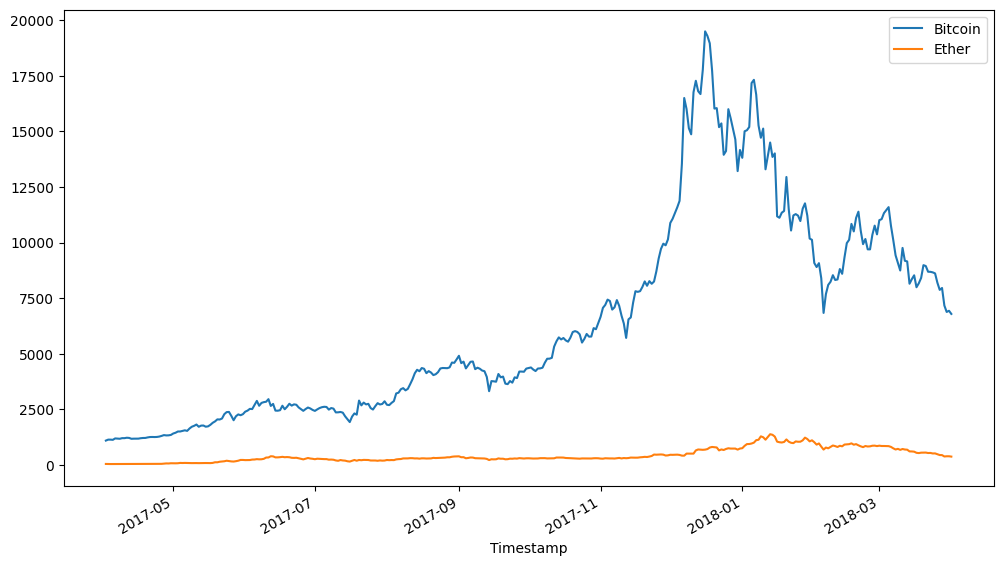

In [110]:
df.drop(df[df['Bitcoin'] > upper_limit].index).plot(figsize=(12, 7))